In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load wine data as an object
data = load_wine()

In [4]:
# print feature names
print(data.feature_names)

# print output labels
print(data.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [5]:
# extract features and output labels

x = data.data # features
y = data.target # labels

In [6]:
# print data shapes

print('Feature shape: ',x.shape)
print('Target shape: ',y.shape)

Feature shape:  (178, 13)
Target shape:  (178,)


In [7]:
# Split data into training and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [8]:
# print training and test shapes

print('Training input shape: ',x_train.shape)
print('Training output shape: ',y_train.shape)
print('Test input shape: ',x_test.shape)
print('Test output shape: ',y_test.shape)

Training input shape:  (142, 13)
Training output shape:  (142,)
Test input shape:  (36, 13)
Test output shape:  (36,)


In [9]:
# Create SVM classifier
C = 1 #regularization parameter
clf = svm.SVC(kernel='linear',C=C).fit(x_train,y_train)

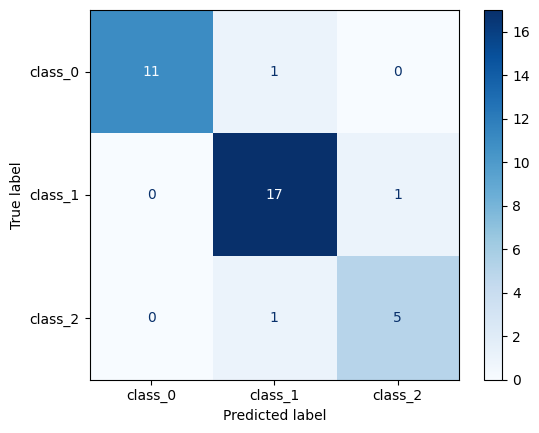

In [10]:
# Confusion matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [11]:
# Classification report
pred_test = clf.predict(x_test)
print(classification_report(y_test,pred_test,target_names = data.target_names))

              precision    recall  f1-score   support

     class_0       1.00      0.92      0.96        12
     class_1       0.89      0.94      0.92        18
     class_2       0.83      0.83      0.83         6

    accuracy                           0.92        36
   macro avg       0.91      0.90      0.90        36
weighted avg       0.92      0.92      0.92        36



In [12]:
# Chanigng number of features
C = 1 #regularization parameter
feat_lim = 3
clf_lim = svm.SVC(kernel='linear',C=C).fit(x_train[:,:feat_lim],y_train)

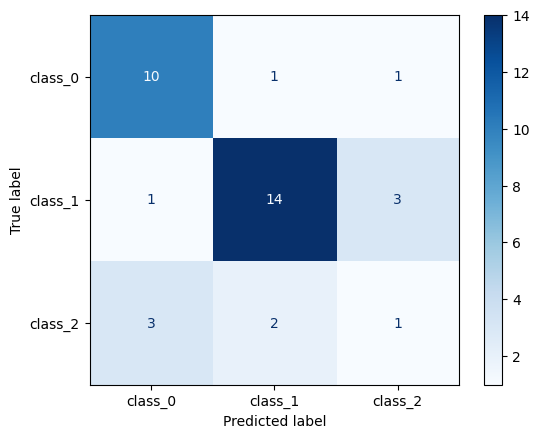

In [13]:
# Confusion matrix
y_pred = clf_lim.predict(x_test[:, :feat_lim])
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [14]:
# Classification report

pred_test = clf_lim.predict(x_test[:,:feat_lim])
print(classification_report(y_test,pred_test,target_names = data.target_names))

              precision    recall  f1-score   support

     class_0       0.71      0.83      0.77        12
     class_1       0.82      0.78      0.80        18
     class_2       0.20      0.17      0.18         6

    accuracy                           0.69        36
   macro avg       0.58      0.59      0.58        36
weighted avg       0.68      0.69      0.69        36



In [15]:
clf_red = svm.SVC(kernel='linear',C=C).fit(x_train[:,:2],y_train)
# clf_red = svm.SVC(kernel='poly',degree=3,C=C).fit(x_train[:,:2],y_train)
# clf_red = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(x_train[:,:2],y_train)
pred_test_red = clf_red.predict(x_test[:,:2])

In [16]:
def create_mesh(X,h):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx,yy

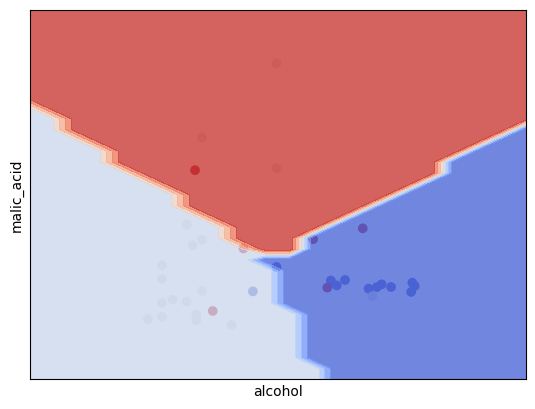

In [17]:
# Plot decision boundary
xx,yy = create_mesh(x_test[:,:2],0.2)
zz = clf_red.predict(np.c_[xx.ravel(),yy.ravel()])
zz = zz.reshape(xx.shape)
plt.figure()
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()